In [555]:
import pandas as pd
import numpy as np

# import  train,test, and label dataset

In [556]:
train = pd.read_csv("D:/Semester 7/Ml_Project/Training_set_values.csv")
test = pd.read_csv("D:/Semester 7/Ml_Project/Test_set_values.csv")
train_label = pd.read_csv("D:/Semester 7/Ml_Project/Training_set_labels.csv")

In [557]:
train.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


# find duplicate rows


In [558]:
col_except_id = list(train.columns)[1:]


In [559]:
print("Number of duplicated rows in train set: " + str(train.duplicated(subset=col_except_id).sum()))

Number of duplicated rows in train set: 37


In [560]:
print("Number of duplicated rows in test set: " + str(test.duplicated(subset=col_except_id).sum()))

Number of duplicated rows in test set: 1


In [561]:
# duplicated_rows = train[train.duplicated(subset = col_except_id)]["id"]
# duplicated_rows = list(duplicated_rows.index)
# duplicated_rows

duplicate_indexes = train.loc[train.duplicated(subset=col_except_id), :]
duplicate_indexes = list(duplicate_indexes.index)
print(duplicate_indexes)

[7709, 8731, 11260, 13823, 17133, 22080, 22140, 25300, 25928, 28518, 29044, 31558, 34310, 34465, 35920, 36069, 37202, 37439, 37925, 38165, 39187, 40287, 40696, 42650, 44093, 46582, 46845, 46923, 49865, 53060, 53441, 53944, 56268, 56599, 57230, 58463, 58859]


### removing identical rows

In [562]:
print("Number of rows in train set: "+ str(len(train.index)))
print("Number of rows in test set: "+ str(len(test.index)))
print("Number of rows in train labels: "+ str(len(train_label.index)))

Number of rows in train set: 59400
Number of rows in test set: 14850
Number of rows in train labels: 59400


In [563]:
train = train.drop_duplicates(subset=col_except_id)
# train_label = train_label.drop(duplicated_rows)

train_label = train_label.drop(train_label.index[duplicate_indexes])

In [564]:
print("Number of rows in train set after removing duplicates: "+ str(len(train.index)))
print("Number of rows in test set after removing duplicates: "+ str(len(test.index)))
print("Number of rows in train label set after removing duplicates: "+ str(len(train_label.index)))

Number of rows in train set after removing duplicates: 59363
Number of rows in test set after removing duplicates: 14850
Number of rows in train label set after removing duplicates: 59363


In [565]:
print("Number of duplicated rows in train set: " + str(train.duplicated(subset=col_except_id).sum()))
print("Number of duplicated rows in test set: " + str(test.duplicated(subset=col_except_id).sum()))
# print(train_label['id'][7709])

Number of duplicated rows in train set: 0
Number of duplicated rows in test set: 1


# Find columns which contain NaN

In [566]:
train_col_with_NaN = train.columns[train.isna().any()].tolist()
test_col_with_NaN = test.columns[test.isna().any()].tolist()

print("columns which contain NaN in train set: " + str(train_col_with_NaN))
print("columns which contain NaN in test set: " + str(test_col_with_NaN))

columns which contain NaN in train set: ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
columns which contain NaN in test set: ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


### remove NaN values from identified columns

In [567]:

for col in train_col_with_NaN:
    
    train[col].fillna(train[col].mode()[0], inplace = True)
    test[col].fillna(test[col].mode()[0], inplace=True)


In [568]:
train.columns[train.isna().any()].tolist()
test.columns[test.isna().any()].tolist()

[]

In [569]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# Label set encoding

In [570]:
data_classes = ['non functional', 'functional needs repair', 'functional']
encoded_label = dict(zip(data_classes, range(0,3,1)))
train_label['status_group'] = train_label['status_group'].map(encoded_label, na_action='ignore')


In [571]:
train_label.head()

,id,status_group
0,69572,2
1,8776,2
2,34310,2
3,67743,0
4,19728,2


# Target encoding

In [572]:
from category_encoders import TargetEncoder



        
for col in col_except_id:
    
    encoder = TargetEncoder()
    if (type(train[col][0]) is str):
        
        
        encoder = encoder.fit(train[col], train_label['status_group'])
        train[col + 'encoded'] = encoder.transform(train[col])
        test[col + 'encoded'] = encoder.transform(test[col])
        train = train.drop([col], axis = 1)
        test = test.drop([col], axis = 1)
        

In [573]:
train.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,payment_typeencoded,water_qualityencoded,quality_groupencoded,quantityencoded,quantity_groupencoded,sourceencoded,source_typeencoded,source_classencoded,waterpoint_typeencoded,waterpoint_type_groupencoded
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,True,...,1.572488,1.20855,1.20855,1.376994,1.376994,1.319506,1.319506,1.144284,1.322146,1.236985
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,True,...,0.972766,1.20855,1.20855,1.142007,1.142007,1.344241,1.344241,1.208377,1.322146,1.236985
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,True,...,1.401046,1.20855,1.20855,1.376994,1.376994,0.809160,0.809160,1.208377,0.838826,1.236985
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,True,...,0.972766,1.20855,1.20855,0.056223,0.056223,1.023128,1.032906,1.144284,0.838826,1.236985
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,True,...,0.972766,1.20855,1.20855,1.250556,1.250556,1.344241,1.344241,1.208377,1.322146,1.236985


In [574]:
test.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,payment_typeencoded,water_qualityencoded,quality_groupencoded,quantityencoded,quantity_groupencoded,sourceencoded,source_typeencoded,source_classencoded,waterpoint_typeencoded,waterpoint_type_groupencoded
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,True,...,0.972766,1.20855,1.20855,1.250556,1.250556,1.344241,1.344241,1.208377,0.309393,0.309393
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,True,...,0.972766,1.20855,1.20855,1.142007,1.142007,1.319506,1.319506,1.144284,1.322146,1.236985
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,True,...,0.972766,1.20855,1.20855,1.142007,1.142007,1.344241,1.344241,1.208377,0.309393,0.309393
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,True,...,0.917384,1.20855,1.20855,0.056223,0.056223,1.045950,1.045950,1.144284,0.309393,0.309393
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,True,...,1.432651,1.20855,1.20855,1.376994,1.376994,1.319506,1.319506,1.144284,1.322146,1.236985


### removing column which has boolean values

In [575]:
train = train.drop(['public_meeting'], axis = 1)
train = train.drop(['permit'], axis = 1)


### removing 'id' column from both train and label set

In [576]:
train_label = train_label.drop(['id'], axis=1)
train = train.drop(['id'], axis=1)

### split train data set to X_train and X_test 

In [577]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,train_label, test_size=0.2, stratify= train_label)



In [578]:
X_train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,date_recordedencoded,...,payment_typeencoded,water_qualityencoded,quality_groupencoded,quantityencoded,quantity_groupencoded,sourceencoded,source_typeencoded,source_classencoded,waterpoint_typeencoded,waterpoint_type_groupencoded
11466,0.0,0,32.423745,-9.104887,0,12,6,0,0,1.221239,...,0.972766,1.208550,1.208550,1.250556,1.250556,1.045950,1.045950,1.144284,1.294229,1.294229
13822,2000.0,1551,34.768331,-8.872993,0,11,4,100,2011,1.907692,...,1.572488,1.208550,1.208550,1.376994,1.376994,1.319506,1.319506,1.144284,1.322146,1.236985
13889,0.0,0,33.513889,-3.447963,0,17,8,0,0,1.128302,...,0.917384,0.300587,0.300587,0.557668,0.557668,1.023128,1.032906,1.144284,0.838826,1.236985
47044,0.0,1224,38.489233,-4.640313,0,4,1,1,1990,1.299799,...,0.972766,1.208550,1.208550,1.376994,1.376994,1.045950,1.045950,1.144284,1.294229,1.294229
5140,0.0,0,32.828529,-8.817823,0,12,6,0,0,1.310044,...,0.972766,1.208550,1.208550,1.250556,1.250556,1.045950,1.045950,1.144284,1.294229,1.294229


# classify using XGB classifier

In [579]:
model = XGBClassifier()


model.fit(X_train, y_train)

C:\Users\sh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### predict using X_test

In [580]:
predictions = model.predict(X_test)

### evaluate predictions

In [581]:

# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.77%


### plot confusion matrix

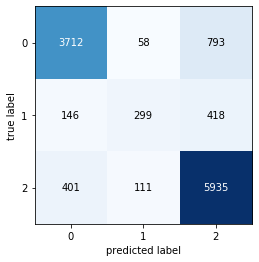

In [582]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


y_test = y_test['status_group']
y_test = list(y_test)
confusion_matrix = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confusion_matrix)
plt.show()

### K-fold cross validation

In [583]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.839 (0.004)


### remove columns which has boolean value from the test dataset 

In [584]:
# print(test_predictions.shape)
test = test.drop(['public_meeting'], axis = 1)
test = test.drop(['permit'], axis = 1)
t = test['id']
test = test.drop(["id"], axis = 1)




### predict values for  test dataset

In [585]:
test_predictions = model.predict(test)

### create csv file for output predictions 

In [586]:

test_predictions = test_predictions.tolist()
list_to_csv = []
t = list(t)
for i  in range(len(t)):
    if (test_predictions[i] == 0):
        list_to_csv.append([t[i], 'non functional'])
    elif (test_predictions[i] == 1):
        list_to_csv.append([t[i], 'functional needs repair'])
    else:
        list_to_csv.append([t[i], 'functional'])

to_csv = pd.DataFrame(list_to_csv, columns=['id', 'status_group'])
to_csv.to_csv('submission_170593H.csv', index = False)

In [587]:
print(len(to_csv.index))

14850
